In [21]:
import json
import codecs
import emoji
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import RussianStemmer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

f = './practice_3/posts_comments_2.json'


In [22]:
i = 0
df = pd.DataFrame()
for line in codecs.open(f , "r", "utf-8-sig"):
    post = json.loads(line)
    df = df.append([[post['text'].lower().split()]], ignore_index = True)
    i += 1
    
df.columns = ['text']

In [12]:
stop = stopwords.words('russian')
stemmer = RussianStemmer()
punctuation = [',', '.', '?', ')', '!', '%', ':', '=']

def delNameAndStopwords(string):
    for index, item in enumerate(string):
        if item in stop:
            string.remove(item)
        elif '[id' in item:
            string[index] = 'name'
            
def delPunctuation(string):
    for index, item in enumerate(string):
        for i in punctuation:
            if i in item: 
                string[index] = item.replace(i,'')
                
def delInt(string):
    for index, item in enumerate(string):
        if item.isdigit():
            string[index] = 'number'
            
def delWeb(string):
     for index, item in enumerate(string):           
        if 'http' in item:
            string[index] = 'website'
        if item in emoji.UNICODE_EMOJI:
            string[index] = emoji.UNICODE_EMOJI[item]
            
def russianStemmer(text):
    k = []
    for i in text:
        k.append(stemmer.stem(i))
    return k
            
def delete(string):
    delNameAndStopwords(string)
    delPunctuation(string)
    delInt(string)
    delWeb(string)
    
    


In [13]:
df['text'].apply(delete)
df['text'] = df['text'].apply(russianStemmer)
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [14]:
df['text']

0        nam корн соглас тем большинств случа виноват п...
1        nam number мотоцикл вес 300кг плюс number мен ...
2        nam старушк буд выж ум выход из-з фур снача по...
3                         nam по город гоня не счита норм😃
4        nam ед гольф number лошадьм трасс я част испыт...
5        nam мен все хорош куп хотел вполн довол плач n...
6        nam тут-т начина разниц случа дтп счита старуш...
7                        nam тихоход - эт скольк не секрет
8        nam например рул лет ваш "странную" точк зрен ...
9        nam 60-70 фур едут трасс зачаст хот город нас ...
10       nam удар сильн бок скат капот наде тольк ушиб ...
11       nam вы перечита поймет защища водител дан случ...
12                                              nam и плат
13       nam number экипаж написа я позвон number что н...
14       ком интересн глубок красн стоя зелен пешеход у...
15       nam да стара избега пеш прогулок город импонир...
16                      nam пешеход зелен машин давн кра

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts= count_vect.fit_transform(df['text'])
X_train_counts.shape

(12000, 18447)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(12000, 18447)

In [ ]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100,
                random_state=1)
    km.fit(X_train_tfidf)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
#plt.tight_layout()
plt.show()

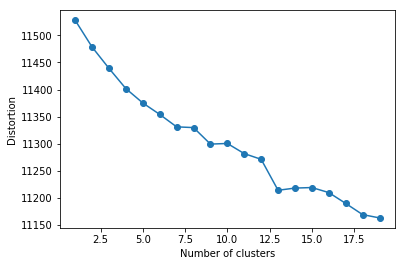

In [40]:
# #plt.savefig('kmeans30config100.1800.png', dpi=300)
# plt.plot(range(1, 20), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# #plt.tight_layout()
# #plt.savefig('kmeans30config30.1000.png', dpi=300)
# plt.show()

In [41]:
km = KMeans(n_clusters=20, 
                init='k-means++', 
                n_init=20, 
                max_iter=200,
                random_state=1)
km.fit(X_train_tfidf)
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=20, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [42]:
for i in range(20):
    #print(count_vect.inverse_transform(km.cluster_centers_[i]))
    print(list(count_vect.vocabulary_.keys())[np.argmax(km.cluster_centers_[i])])

убав
погибл
утянул
перецепля
пападос
тухну
власть
дог
унитаз
наб
улицеесл
сквоз
животных
погибл
возмещен
моменткогд
карается
пешеходы
ноютчт
компенсац


In [43]:
for i in range(20):
    print(count_vect.inverse_transform(km.cluster_centers_[i]))

[array(['10', '1600', '20', ..., 'язык', 'ярлык', 'ясн'], 
      dtype='<U40')]
[array(['nam'], 
      dtype='<U40')]
[array(['10', '100', '1130', ..., 'ярлык', 'ясн', 'ячт'], 
      dtype='<U40')]
[array(['1000авар', '20', '25час', '2к', '300', '30к', '37к1', '3х', '40',
       '400', '6мульт', '90', '900до', '900к', '98мпосл', 'nam', 'number',
       'smirking_face', 'автомат', 'автомобил', 'автор', 'авторизова',
       'ад', 'адекватн', 'ао', 'аплодир', 'аплодисмент', 'арестова',
       'асфальт', 'атеист', 'базар', 'бакс', 'баллончик', 'бампер', 'бега',
       'бездушн', 'безмозгл', 'безответствен', 'берут', 'бесплатн', 'бит',
       'бл', 'благ', 'блин', 'блондинк', 'богу', 'бол', 'больн', 'больш',
       'борз', 'боя', 'брав', 'бригад', 'брон', 'брос', 'брошен', 'будет',
       'будт', 'бутылк', 'бы', 'быва', 'был', 'быстр', 'бьет', 'бьют',
       'вагон', 'важн', 'ваз', 'вам', 'ващет', 'ввид', 'ве', 'ведер',
       'ведр', 'везд', 'верн', 'вероятн', 'верт', 'верюон', 'вечн', 'ве

[array(['42пдд', '_winking_eye', 'face_with_rolling_eyes',
       'face_with_stuck', 'grimacing_face', 'hushed_face', 'mouth', 'nam',
       'number', 'out_tongue_', 'pouting_face', 'smirking_face', 'webs',
       'аварийк', 'авт', 'автоматическ', 'автомоб', 'автомобил', 'автор',
       'автосалон', 'аг', 'агресс', 'адекватныекотор', 'азс', 'айс',
       'аккурат', 'алкогол', 'амбиц', 'апломб', 'аренд', 'афигет',
       'ахахахах', 'ахт', 'бабл', 'багажник', 'бак', 'балкан', 'баллон',
       'бантик', 'бегают', 'бед', 'без', 'бел', 'бессмыслен', 'бестолков',
       'благоразумн', 'близк', 'бо', 'бог', 'бойсяуж', 'бол', 'больш',
       'большинств', 'бот', 'бред', 'буд', 'будет', 'будеш', 'будут',
       'будьт', 'бухгалтер', 'бы', 'быва', 'был', 'бьют', 'важн', 'ваз',
       'вам', 'вас', 'ваш', 'вед', 'ведр', 'везд', 'вернут', 'вест',
       'вечн', 'вещ', 'взаимосвяза', 'взял', 'виадук', 'вид', 'виде',
       'видим', 'видночт', 'виж', 'вин', 'виноват', 'виновн',
       'виселнепонят

In [17]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


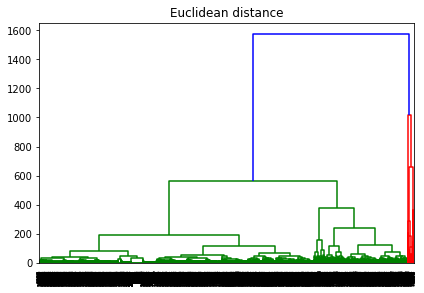

In [18]:
l = euclidean_distances(X_train_counts,X_train_counts)

row_clusters = linkage(l, method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.title('Euclidean distance')
plt.savefig('dendrogram_euclidean.png', dpi=300, 
           bbox_inches='tight')
plt.show()

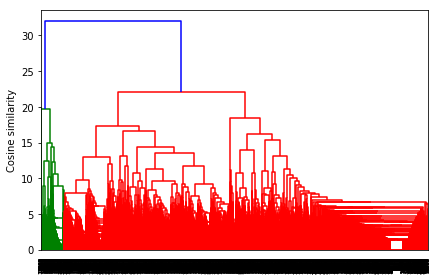

In [54]:
l = cosine_similarity(X_train_counts,X_train_counts)
row_clusters = linkage(l, method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.title('Cosine similarity')
# plt.savefig('dendrogram_cosine.png', dpi=300, 
#            bbox_inches='tight')
plt.show()